In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.metrics import r2_score
%matplotlib inline 
sns.set(style="ticks")

import warnings
warnings.filterwarnings('ignore')

In [8]:
data = pd.read_csv("data/hotel_bookings.csv")

In [9]:
data.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [10]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [12]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [18]:
corr = data.corr()
data.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


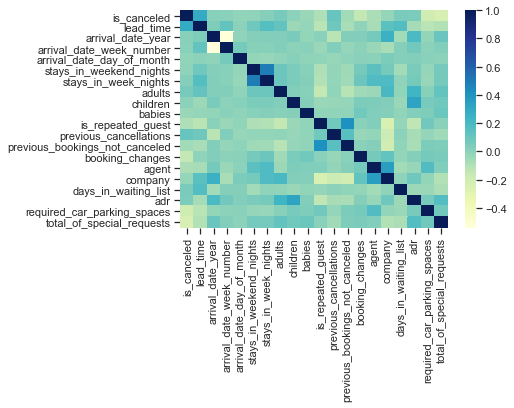

In [19]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
           cmap='YlGnBu')

## Между stays_in_weekend_nights и stays_in_week_nights есть корреляция 0.5

In [20]:
x = data["stays_in_weekend_nights"].values
y = data["stays_in_week_nights"].values

reg = BayesianRidge(fit_intercept=True).fit(x.reshape(-1, 1), y.reshape(-1, 1))
reg.coef_
reg.intercept_

1.615861328628435

In [21]:
def func(w, b, x):
    return w*x + b

In [24]:
x_t = list(range(0, 25))
y_t = [func(reg.coef_[0], reg.intercept_, x) for x in x_t]
y_tt = reg.predict(x.reshape(-1, 1))

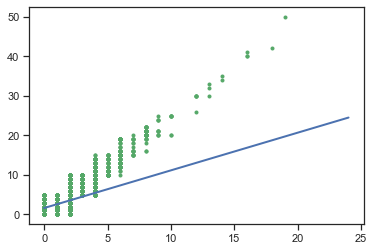

In [25]:
plt.plot(x, y, 'g.')
plt.plot(x_t, y_t, 'b', linewidth=2.0)
plt.show()

### Модель линейной регрессии дала неплохой результат

## SVM

In [156]:
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR

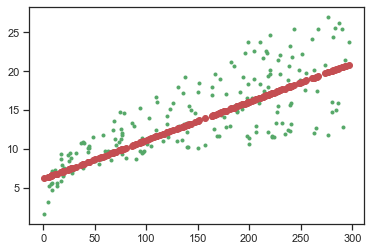

In [157]:
lin_SVR = LinearSVR(C=1.0, max_iter=10000)
lin_SVR.fit(x.reshape(-1, 1), y)
predict = lin_SVR.predict(x.reshape(-1, 1))
plt.plot(x, y, 'g.')
plt.plot(x, predict, 'ro')

## Деревья решений

In [158]:
dec_tree = DecisionTreeRegressor(random_state=1, max_depth=5)
dec_tree.fit(data, data["Sales"])
dec_tree


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [159]:
dec_predict = dec_tree.predict(data)

[Text(167.4, 199.32, 'X[3] <= 15.1\nmse = 27.086\nsamples = 200\nvalue = 14.023'),
 Text(83.7, 163.07999999999998, 'X[3] <= 10.0\nmse = 7.31\nsamples = 125\nvalue = 10.67'),
 Text(41.85, 126.83999999999999, 'X[3] <= 7.45\nmse = 3.527\nsamples = 45\nvalue = 7.767'),
 Text(20.925, 90.6, 'X[0] <= 4.75\nmse = 2.173\nsamples = 18\nvalue = 5.872'),
 Text(10.4625, 54.359999999999985, 'X[3] <= 2.4\nmse = 0.64\nsamples = 2\nvalue = 2.4'),
 Text(5.23125, 18.119999999999976, 'mse = 0.0\nsamples = 1\nvalue = 1.6'),
 Text(15.693750000000001, 18.119999999999976, 'mse = -0.0\nsamples = 1\nvalue = 3.2'),
 Text(31.387500000000003, 54.359999999999985, 'X[3] <= 6.25\nmse = 0.669\nsamples = 16\nvalue = 6.306'),
 Text(26.15625, 18.119999999999976, 'mse = 0.108\nsamples = 7\nvalue = 5.443'),
 Text(36.61875, 18.119999999999976, 'mse = 0.075\nsamples = 9\nvalue = 6.978'),
 Text(62.775000000000006, 90.6, 'X[3] <= 9.0\nmse = 0.442\nsamples = 27\nvalue = 9.03'),
 Text(52.3125, 54.359999999999985, 'X[3] <= 8.25\n

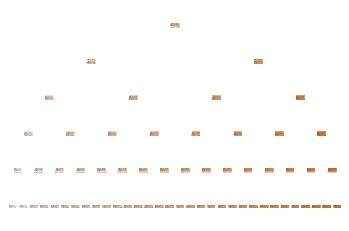

In [160]:
from sklearn import tree
tree.plot_tree(dec_tree, filled=True)

## Метрики качества

In [161]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 

print("Метрики для линейной модели:\n")
print("Средняя абсолютная ошибка: ", mean_absolute_error(y, y_tt))
print("Средняя квадратичная ошибка: ", mean_squared_error(y, y_tt))
print("Коэффициент детерминации: ", r2_score(y, y_tt))

print("\n\nМетрики для SVM-модели:\n")
print("Средняя абсолютная ошибка: ", mean_absolute_error(y, predict))
print("Средняя квадратичная ошибка: ", mean_squared_error(y, predict))
print("Коэффициент детерминации: ", r2_score(y, predict))


print("\n\nМетрики для Decision Tree:\n")
print("Средняя абсолютная ошибка: ", mean_absolute_error(y, dec_predict))
print("Средняя квадратичная ошибка: ", mean_squared_error(y, dec_predict))
print("Коэффициент детерминации: ", r2_score(y, dec_predict))

Метрики для линейной модели:

Средняя абсолютная ошибка:  2.550919383216356
Средняя квадратичная ошибка:  10.512821002854928
Коэффициент детерминации:  0.6118688451058344


Метрики для SVM-модели:

Средняя абсолютная ошибка:  2.5708683334350892
Средняя квадратичная ошибка:  10.859652690875892
Коэффициент детерминации:  0.5990638916505333


Метрики для Decision Tree:

Средняя абсолютная ошибка:  0.14353164841694266
Средняя квадратичная ошибка:  0.03201810934980053
Коэффициент детерминации:  0.9988178980926156


## Подбор гиперпараметров. Кросс-валидация

In [162]:
from sklearn.model_selection import cross_validate

In [111]:
scoring = {'mean': 'neg_mean_absolute_error', 'square': 'neg_mean_squared_error', 'r2': 'r2'}

In [163]:
scores_regr = cross_validate(BayesianRidge(fit_intercept=True), 
                         x.reshape(-1, 1), y, cv=3, scoring=scoring)
scores_regr

{'fit_time': array([0.00085902, 0.00085711, 0.00055289]),
 'score_time': array([0.00140524, 0.00080299, 0.00078702]),
 'test_mean': array([-2.51215213, -2.46200408, -2.76711466]),
 'test_square': array([-10.83437466,  -9.33658309, -11.90833409]),
 'test_r2': array([0.61497417, 0.65311667, 0.53715304])}

In [164]:
scores_svm = cross_validate(LinearSVR(C=1.0, max_iter=10000), 
                         x.reshape(-1, 1), y, cv=3, scoring=scoring)
scores_svm

{'fit_time': array([0.03139281, 0.02713585, 0.02338099]),
 'score_time': array([0.00076604, 0.00061393, 0.00054908]),
 'test_mean': array([-2.54098772, -2.37148251, -3.1291242 ]),
 'test_square': array([-11.0231287 ,  -9.81978964, -15.84997398]),
 'test_r2': array([0.60826634, 0.63516403, 0.38395142])}

In [165]:
scores_dec = cross_validate(DecisionTreeRegressor(random_state=1, max_depth=3), 
                         data, data["Sales"], cv=5, scoring=scoring)
scores_dec

{'fit_time': array([0.00271297, 0.0020709 , 0.00206208, 0.00199294, 0.00195193]),
 'score_time': array([0.0018599 , 0.00148034, 0.00148678, 0.00142694, 0.0014143 ]),
 'test_mean': array([-0.72293478, -0.7307461 , -0.66116873, -0.85487267, -0.91550049]),
 'test_square': array([-0.64975012, -0.70991464, -0.63349151, -1.4104023 , -1.08449788]),
 'test_r2': array([0.97486214, 0.97589358, 0.97175881, 0.95176776, 0.95938815])}

In [166]:
print("Метрики для линейной модели:\n")
print("Средняя абсолютная ошибка: ", np.mean(scores_regr['test_mean']))
print("Средняя квадратичная ошибка: ", np.mean(scores_regr['test_square']))
print("Коэффициент детерминации: ", np.mean(scores_regr['test_r2']))

print("\n\nМетрики для SVM-модели:\n")
print("Средняя абсолютная ошибка: ", np.mean(scores_svm['test_mean']))
print("Средняя квадратичная ошибка: ", np.mean(scores_svm['test_square']))
print("Коэффициент детерминации: ", np.mean(scores_svm['test_r2']))


print("\n\nМетрики для Decision Tree:\n")
print("Средняя абсолютная ошибка: ", np.mean(scores_dec['test_mean']))
print("Средняя квадратичная ошибка: ", np.mean(scores_dec['test_square']))
print("Коэффициент детерминации: ", np.mean(scores_dec['test_r2']))

Метрики для линейной модели:

Средняя абсолютная ошибка:  -2.580423621885709
Средняя квадратичная ошибка:  -10.693097277894969
Коэффициент детерминации:  0.601747959666948


Метрики для SVM-модели:

Средняя абсолютная ошибка:  -2.6805314771806956
Средняя квадратичная ошибка:  -12.23096410841425
Коэффициент детерминации:  0.5424605962417798


Метрики для Decision Tree:

Средняя абсолютная ошибка:  -0.7770445553321956
Средняя квадратичная ошибка:  -0.8976112886827845
Коэффициент детерминации:  0.9667340888852873


## Оптимизация с помощью решетчатого поиска

In [167]:
from sklearn.model_selection import GridSearchCV

In [168]:
n_range = np.array(range(1,10,1))
tuned_parameters = [{'max_depth': n_range}]
tuned_parameters

[{'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}]

In [169]:
%%time
clf_gs = GridSearchCV(DecisionTreeRegressor(), tuned_parameters, cv=5, scoring='r2')
clf_gs.fit(x.reshape(-1, 1), y)

CPU times: user 48.9 ms, sys: 1.26 ms, total: 50.2 ms
Wall time: 49.2 ms


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
  

In [170]:
# Лучшая модель
clf_gs.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [171]:
clf_gs.best_score_

0.5464056968965096

In [172]:
clf_gs.best_params_

{'max_depth': 3}

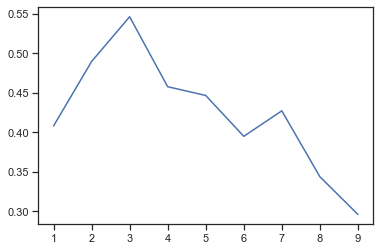

In [173]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

### Оптимизация SVM

In [174]:
param_grid = {'C': [0.1,1, 10, 100], 'epsilon': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

In [175]:
grid = GridSearchCV(LinearSVR(),param_grid,refit=True,verbose=2)
grid.fit(x.reshape(-1, 1),y)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] C=0.1, epsilon=0.1 ..............................................
[CV] ............................... C=0.1, epsilon=0.1, total=   0.0s
[CV] C=0.1, epsilon=0.1 ..............................................
[CV] ............................... C=0.1, epsilon=0.1, total=   0.0s
[CV] C=0.1, epsilon=0.1 ..............................................
[CV] ............................... C=0.1, epsilon=0.1, total=   0.0s
[CV] C=0.1, epsilon=0.1 ..............................................
[CV] ............................... C=0.1, epsilon=0.1, total=   0.0s
[CV] C=0.1, epsilon=0.1 ..............................................
[CV] ............................... C=0.1, epsilon=0.1, total=   0.0s
[CV] C=0.1, epsilon=0.2 ..............................................
[CV] ............................... C=0.1, epsilon=0.2, total=   0.0s
[CV] C=0.1, epsilon=0.2 ..............................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................. C=1, epsilon=0.1, total=   0.0s
[CV] C=1, epsilon=0.1 ................................................
[CV] ................................. C=1, epsilon=0.1, total=   0.0s
[CV] C=1, epsilon=0.1 ................................................
[CV] ................................. C=1, epsilon=0.1, total=   0.0s
[CV] C=1, epsilon=0.1 ................................................
[CV] ................................. C=1, epsilon=0.1, total=   0.0s
[CV] C=1, epsilon=0.2 ................................................
[CV] ................................. C=1, epsilon=0.2, total=   0.0s
[CV] C=1, epsilon=0.2 ................................................
[CV] ................................. C=1, epsilon=0.2, total=   0.0s
[CV] C=1, epsilon=0.2 ................................................
[CV] ................................. C=1, epsilon=0.2, total=   0.0s
[CV] C=1, epsilon=0.2 ................................................
[CV] .

[CV] ............................... C=100, epsilon=0.1, total=   0.0s
[CV] C=100, epsilon=0.1 ..............................................
[CV] ............................... C=100, epsilon=0.1, total=   0.0s
[CV] C=100, epsilon=0.1 ..............................................
[CV] ............................... C=100, epsilon=0.1, total=   0.0s
[CV] C=100, epsilon=0.2 ..............................................
[CV] ............................... C=100, epsilon=0.2, total=   0.0s
[CV] C=100, epsilon=0.2 ..............................................
[CV] ............................... C=100, epsilon=0.2, total=   0.0s
[CV] C=100, epsilon=0.2 ..............................................
[CV] ............................... C=100, epsilon=0.2, total=   0.0s
[CV] C=100, epsilon=0.2 ..............................................
[CV] ............................... C=100, epsilon=0.2, total=   0.0s
[CV] C=100, epsilon=0.2 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.8s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                 fit_intercept=True, intercept_scaling=1.0,
                                 loss='epsilon_insensitive', max_iter=1000,
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'epsilon': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                     0.9, 1.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [176]:
grid.best_estimator_

LinearSVR(C=10, dual=True, epsilon=1.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [177]:
grid.best_score_

0.5440492644611755

In [178]:
grid.best_params_

{'C': 10, 'epsilon': 1.0}

In [182]:
parameters = {"alpha_1": np.logspace(-13,-5,10),
              "alpha_2": np.logspace(-9,-3,10),
              "lambda_1": np.logspace(-10,-5,10),
              "lambda_2": np.logspace(-11,-4,10)}

grid_regr = GridSearchCV(BayesianRidge(), parameters, cv=3, n_jobs=-1)
grid_regr.fit(x.reshape(-1, 1), y)    

GridSearchCV(cv=3, error_score=nan,
             estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                     alpha_init=None, compute_score=False,
                                     copy_X=True, fit_intercept=True,
                                     lambda_1=1e-06, lambda_2=1e-06,
                                     lambda_init=None, n_iter=300,
                                     normalize=False, tol=0.001,
                                     verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha_1': array([1.00000000e-13, 7.74263683e-13, 5.99484250e-...
                         'lambda_1': array([1.00000000e-10, 3.59381366e-10, 1.29154967e-09, 4.64158883e-09,
       1.66810054e-08, 5.99484250e-08, 2.15443469e-07, 7.74263683e-07,
       2.78255940e-06, 1.00000000e-05]),
                         'lambda_2': array([1.00000000e-11, 5.99484250e-11, 3.59381366e-10, 2.15443469e-09,
       1.29154967e-08, 7.74263683e-08

In [186]:
grid_regr.best_estimator_

BayesianRidge(alpha_1=1e-05, alpha_2=1e-09, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-10, lambda_2=0.0001, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [187]:
grid_regr.best_score_

0.6017531508217578

In [188]:
grid_regr.best_params_

{'alpha_1': 1e-05, 'alpha_2': 1e-09, 'lambda_1': 1e-10, 'lambda_2': 0.0001}

In [189]:
reg = BayesianRidge(fit_intercept=True, alpha_1=1e-05, alpha_2=1e-09, lambda_1=1e-10, lambda_2=0.0001).fit(x.reshape(-1, 1), y.reshape(-1, 1))
y_tt = reg.predict(x.reshape(-1, 1))

lin_SVR = LinearSVR(C=1.0, max_iter=10000, epsilon=1.0)
lin_SVR.fit(x.reshape(-1, 1), y)
predict = lin_SVR.predict(x.reshape(-1, 1))

dec_tree = DecisionTreeRegressor(random_state=1, max_depth=3)
dec_tree.fit(data, data["Sales"])
dec_predict = dec_tree.predict(data)

In [190]:
print("Метрики для линейной модели:\n")
print("Средняя абсолютная ошибка: ", mean_absolute_error(y, y_tt))
print("Средняя квадратичная ошибка: ", mean_squared_error(y, y_tt))
print("Коэффициент детерминации: ", r2_score(y, y_tt))

print("\n\nМетрики для SVM-модели:\n")
print("Средняя абсолютная ошибка: ", mean_absolute_error(y, predict))
print("Средняя квадратичная ошибка: ", mean_squared_error(y, predict))
print("Коэффициент детерминации: ", r2_score(y, predict))


print("\n\nМетрики для Decision Tree:\n")
print("Средняя абсолютная ошибка: ", mean_absolute_error(y, dec_predict))
print("Средняя квадратичная ошибка: ", mean_squared_error(y, dec_predict))
print("Коэффициент детерминации: ", r2_score(y, dec_predict))

Метрики для линейной модели:

Средняя абсолютная ошибка:  2.5508292802546
Средняя квадратичная ошибка:  10.512794897173503
Коэффициент детерминации:  0.6118698089221382


Метрики для SVM-модели:

Средняя абсолютная ошибка:  2.5996867264932724
Средняя квадратичная ошибка:  11.18839596468356
Коэффициент детерминации:  0.586926758668624


Метрики для Decision Tree:

Средняя абсолютная ошибка:  0.7095532407407409
Средняя квадратичная ошибка:  0.7222188657407407
Коэффициент детерминации:  0.9733358303760538


## После подбора параметров модели показали лучший результат, чем без подбора.